### Early Prediction of Motor Insurance Cost Using FNOL Data Project

### 1. IMPORT NECESSARIES LIBRERIE

In [1]:
import pandas as pd             # For data manipulation
import numpy as np              # For numerical computation
import seaborn as sns           # For data visualization
import matplotlib.pyplot as plt # For data visualization

### 2. DATA COLECTION

##### For this project, we will use three datasets, which will be loaded separately as shown below.

In [2]:
# Load data Claim dataset
data_claims = pd.read_csv("claims.csv")

In [3]:
# Let Verify the Claims dataset
data_claims.head(2)

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Settlement_Date,Status
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,Minor,2020-03-01,settled
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,Minor,2019-03-23,settled


In [4]:
# Claims data format 
data_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Claim_ID                8000 non-null   object 
 1   Policy_ID               8000 non-null   object 
 2   Accident_Date           8000 non-null   object 
 3   FNOL_Date               8000 non-null   object 
 4   Claim_Type              8000 non-null   object 
 5   Claim_Complexity        8000 non-null   object 
 6   Fraud_Flag              8000 non-null   bool   
 7   Litigation_Flag         8000 non-null   bool   
 8   Estimated_Claim_Amount  8000 non-null   int64  
 9   Ultimate_Claim_Amount   7575 non-null   float64
 10  Severity_Band           8000 non-null   object 
 11  Settlement_Date         7575 non-null   object 
 12  Status                  8000 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 703.3+ KB


In [5]:
# Load data policyholders
data_policyholders = pd.read_csv("policyholders.csv")

In [6]:
# Data Policyholders confirmation
data_policyholders.head(3)

,Policy_ID,Customer_ID,Age_of_Driver,Gender,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band
0,POL10000,CUST20000,56,Female,Retired,Newcastle,7552,36,Sedan,10,Fair
1,POL10001,CUST20001,53,Female,Unemployed,Bristol,13275,31,Motorcycle,11,Poor
2,POL10002,CUST20002,19,Female,Unemployed,London,12967,0,Sedan,9,Excellent


In [7]:
# Data format verification
data_policyholders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Policy_ID                 5000 non-null   object
 1   Customer_ID               5000 non-null   object
 2   Age_of_Driver             5000 non-null   int64 
 3   Gender                    5000 non-null   object
 4   Occupation                5000 non-null   object
 5   Region                    5000 non-null   object
 6   Annual_Mileage            5000 non-null   int64 
 7   Driving_Experience_Years  5000 non-null   int64 
 8   Vehicle_Type              5000 non-null   object
 9   Vehicle_Age               5000 non-null   int64 
 10  Credit_Score_Band         5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [8]:
#Load data third parties
data_third_parties = pd.read_csv("third_parties.csv")

In [9]:
# Data data_third_parties confirmation
data_third_parties.head()

,Claim_ID,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,TP40000,Pedestrian,Minor
1,CLM30002,TP40001,Passenger,Minor
2,CLM30007,TP40002,Pedestrian,Minor
3,CLM30012,TP40003,Pedestrian,Minor
4,CLM30015,TP40004,Driver,Minor


In [10]:
# Data format verification
data_third_parties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Claim_ID            2410 non-null   object
 1   TP_ID               2410 non-null   object
 2   ThirdParty_Role     2410 non-null   object
 3   TP_Injury_Severity  2410 non-null   object
dtypes: object(4)
memory usage: 75.4+ KB


#### Data Colection Observation

    - We are working with three datasets, each containing distinct and valuable information: the Claims table, the Policy table, and the Third-Party table.
    - The Claims and Policy tables can be reliably joined using Policy_ID as the primary linking key.
    - The Third-Party table does not include a direct policy identifier; therefore, it can only be linked to the other datasets via Claim_ID.
    To ensure that all claim records are retained and no information is lost, we will use left joins throughout the merging process.
    Any resulting missing values from these joins will be addressed during the subsequent data-cleaning phase

#### Let Joint the table 

In [11]:
# 1. Join Claims + Policy (left join)
claims_with_policy = data_claims.merge(
    data_policyholders,
    on="Policy_ID",
    how="left"
)

# 2. Join the above with Third-Party table (left join)
final_df = claims_with_policy.merge(
   data_third_parties,
    on="Claim_ID",
    how="left"
)

In [12]:
# Joint table confirmation
final_df.head()

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Retired,Glasgow,4891,34,Hatchback,6,Excellent,TP40000,Pedestrian,Minor
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,...,Employed,Newcastle,18408,23,Van,9,Fair,NaN,NaN,NaN
2,CLM30002,POL13575,2021-10-19,2021-10-19,Other,Medium,False,False,153631,156497.0,...,Unemployed,Newcastle,10793,0,SUV,5,Excellent,TP40001,Passenger,Minor
3,CLM30003,POL10138,2021-06-18,2021-06-18,Weather,Low,False,False,2812,1450.0,...,Employed,Newcastle,9405,5,Hatchback,13,Good,NaN,NaN,NaN
4,CLM30004,POL12316,2021-03-21,2021-03-24,Theft,Low,False,False,5094,4243.0,...,Unemployed,Leeds,16729,9,Hatchback,12,Excellent,NaN,NaN,NaN


In [13]:
# Let call our dataset data instead of final_df
data = final_df

In [14]:
data.head(2)

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Retired,Glasgow,4891,34,Hatchback,6,Excellent,TP40000,Pedestrian,Minor
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,...,Employed,Newcastle,18408,23,Van,9,Fair,NaN,NaN,NaN


### EDA - EXPLORATORY DATA ANALYSE

### 3. DATA CLEANING

In [15]:
# Let check the data format , Adjust if necessary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Claim_ID                  8413 non-null   object 
 1   Policy_ID                 8413 non-null   object 
 2   Accident_Date             8413 non-null   object 
 3   FNOL_Date                 8413 non-null   object 
 4   Claim_Type                8413 non-null   object 
 5   Claim_Complexity          8413 non-null   object 
 6   Fraud_Flag                8413 non-null   bool   
 7   Litigation_Flag           8413 non-null   bool   
 8   Estimated_Claim_Amount    8413 non-null   int64  
 9   Ultimate_Claim_Amount     7968 non-null   float64
 10  Severity_Band             8413 non-null   object 
 11  Settlement_Date           7968 non-null   object 
 12  Status                    8413 non-null   object 
 13  Customer_ID               8413 non-null   object 
 14  Age_of_D

#### Data Cleaning Observation

- The combined dataset contains 8,413 rows and 26 columns, with a notable number of missing values resulting from the table joins.
- The Accident_Date column should be converted to a datetime data type.
- The FNOL_Date column should also be converted to a datetime data type.
- Several columns contain missing values, which will be examined and addressed in detail during the subsequent data exploration and cleaning phase.

#### Let Convert the date columns to correct data type

In [16]:
data["Accident_Date"] = pd.to_datetime(data["Accident_Date"])     # convert from object to datatime
data["FNOL_Date"] = pd.to_datetime(data["FNOL_Date"])             # convert from object to datatime
data["Settlement_Date"] = pd.to_datetime(data["Settlement_Date"]) # convert from object to datatime

In [17]:
# Data type confirmation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Claim_ID                  8413 non-null   object        
 1   Policy_ID                 8413 non-null   object        
 2   Accident_Date             8413 non-null   datetime64[ns]
 3   FNOL_Date                 8413 non-null   datetime64[ns]
 4   Claim_Type                8413 non-null   object        
 5   Claim_Complexity          8413 non-null   object        
 6   Fraud_Flag                8413 non-null   bool          
 7   Litigation_Flag           8413 non-null   bool          
 8   Estimated_Claim_Amount    8413 non-null   int64         
 9   Ultimate_Claim_Amount     7968 non-null   float64       
 10  Severity_Band             8413 non-null   object        
 11  Settlement_Date           7968 non-null   datetime64[ns]
 12  Status              

#### Let Handle Missing value

In [18]:
# Let check missing values columns
data.isnull().sum()

Claim_ID                       0
Policy_ID                      0
Accident_Date                  0
FNOL_Date                      0
Claim_Type                     0
Claim_Complexity               0
Fraud_Flag                     0
Litigation_Flag                0
Estimated_Claim_Amount         0
Ultimate_Claim_Amount        445
Severity_Band                  0
Settlement_Date              445
Status                         0
Customer_ID                    0
Age_of_Driver                  0
Gender                         0
Occupation                     0
Region                         0
Annual_Mileage                 0
Driving_Experience_Years       0
Vehicle_Type                   0
Vehicle_Age                    0
Credit_Score_Band              0
TP_ID                       6003
ThirdParty_Role             6003
TP_Injury_Severity          6003
dtype: int64

#### Missing Value Observation

- The dataset contains (5) five columns with missing values, each requiring a different treatment based on business context.
  
- Ultimate_Claim_Amount: Missing values are associated with claims that are not yet settled. was filled with median to evoid outlier.
  
- Settlement_Date: Missing values indicate unsettled claims and was filled with mode.

-TP_ID: As this column is purely an identifier and does not add analytical value,was droped.

- ThirdParty_Role: Missing values will be explicitly labeled as “No_Third_Party” to indicate the absence of third-party involvement.
- 
-TP_Injury_Severity: Missing values will also be labeled as “No_Third_Party”, ensuring consistency and preserving business meaning.

In [19]:
# Handle Missing values
data["Ultimate_Claim_Amount"] = data["Ultimate_Claim_Amount"].fillna(data["Ultimate_Claim_Amount"].median())
data["Settlement_Date"] = data["Settlement_Date"].fillna(data["Settlement_Date"].mode()[0])
data["ThirdParty_Role"] = data["ThirdParty_Role"].fillna("No_thirdparty")
data["TP_Injury_Severity"] = data["TP_Injury_Severity"].fillna("No_thirdparty")


In [20]:
# Data missing value confirmation
data.isnull().sum()

Claim_ID                       0
Policy_ID                      0
Accident_Date                  0
FNOL_Date                      0
Claim_Type                     0
Claim_Complexity               0
Fraud_Flag                     0
Litigation_Flag                0
Estimated_Claim_Amount         0
Ultimate_Claim_Amount          0
Severity_Band                  0
Settlement_Date                0
Status                         0
Customer_ID                    0
Age_of_Driver                  0
Gender                         0
Occupation                     0
Region                         0
Annual_Mileage                 0
Driving_Experience_Years       0
Vehicle_Type                   0
Vehicle_Age                    0
Credit_Score_Band              0
TP_ID                       6003
ThirdParty_Role                0
TP_Injury_Severity             0
dtype: int64

### 4 FEATURE ENGINIEERING

#### Let check Categorical incocistency

In [21]:
data.head(3)

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Retired,Glasgow,4891,34,Hatchback,6,Excellent,TP40000,Pedestrian,Minor
1,CLM30001,POL14338,2018-12-30,2018-12-31,Collision,Low,False,False,3934,2952.0,...,Employed,Newcastle,18408,23,Van,9,Fair,NaN,No_thirdparty,No_thirdparty
2,CLM30002,POL13575,2021-10-19,2021-10-19,Other,Medium,False,False,153631,156497.0,...,Unemployed,Newcastle,10793,0,SUV,5,Excellent,TP40001,Passenger,Minor


In [22]:
# Categorical data inconsistency verification
data['Claim_Type'].value_counts()

Claim_Type
Collision    4614
Weather      1274
Theft         851
Vandalism     807
Fire          444
Other         423
Name: count, dtype: int64

In [23]:
# Categorical data inconsistency verification
data['Claim_Complexity'].value_counts()

Claim_Complexity
Low       5870
Medium    1876
High       667
Name: count, dtype: int64

In [24]:
# Categorical data inconsistency verification
data['Fraud_Flag'].value_counts()

Fraud_Flag
False    7993
True      420
Name: count, dtype: int64

In [25]:
# Categorical data inconsistency verification
data['Litigation_Flag'].value_counts()

Litigation_Flag
False    7557
True      856
Name: count, dtype: int64

In [26]:
# Categorical data inconsistency verification
data['Region'].value_counts()

Region
Glasgow       946
Liverpool     866
London        860
Bristol       855
Edinburgh     849
Newcastle     836
Manchester    825
Cardiff       811
Leeds         787
Birmingham    778
Name: count, dtype: int64

In [27]:
# Categorical data inconsistency verification
data['Vehicle_Type'].value_counts()

Vehicle_Type
Sedan         2605
Hatchback     1971
SUV           1776
Coupe          891
Van            751
Motorcycle     419
Name: count, dtype: int64

In [28]:
# Categorical data inconsistency verification
data['Credit_Score_Band'].value_counts()

Credit_Score_Band
Good         3458
Excellent    2546
Fair         1605
Poor          804
Name: count, dtype: int64

In [29]:
# Categorical data inconsistency verification
data['ThirdParty_Role'].value_counts()

ThirdParty_Role
No_thirdparty    6003
Passenger         836
Pedestrian        797
Driver            777
Name: count, dtype: int64

In [30]:
# Categorical data inconsistency verification
data['TP_Injury_Severity'].value_counts()

TP_Injury_Severity
No_thirdparty    6003
Minor            2050
Serious           342
Fatal              18
Name: count, dtype: int64

In [31]:
data.head(1)

,Claim_ID,Policy_ID,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,...,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,TP_ID,ThirdParty_Role,TP_Injury_Severity
0,CLM30000,POL14506,2019-12-19,2019-12-19,Theft,Medium,False,True,5243,2808.0,...,Retired,Glasgow,4891,34,Hatchback,6,Excellent,TP40000,Pedestrian,Minor


#### Drop irrelevant columns

In [32]:
# List of irrelevant or non-analytical columns
cols_to_drop = [
    "Claim_ID",
    "Policy_ID",
    "Customer_ID",
    "TP_ID"
]

# Drop columns
data = data.drop(columns=cols_to_drop)

#### Colum Inconsistency Observation

    - Based on our observations, no inconsistencies were identified in the categorical data.
    - To ensure all patterns and potential issues are fully captured, we will proceed with visualizing the data.

#### Let Visualize the categorical data

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


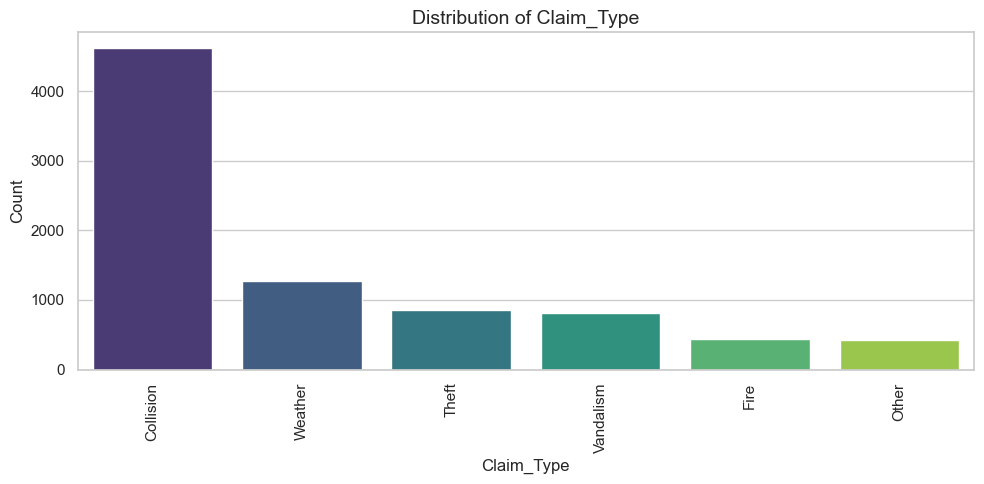

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


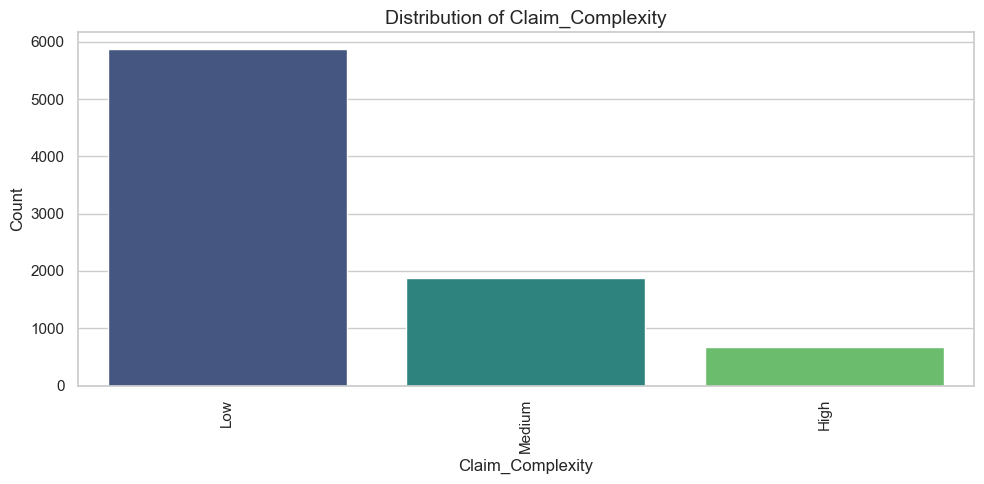

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


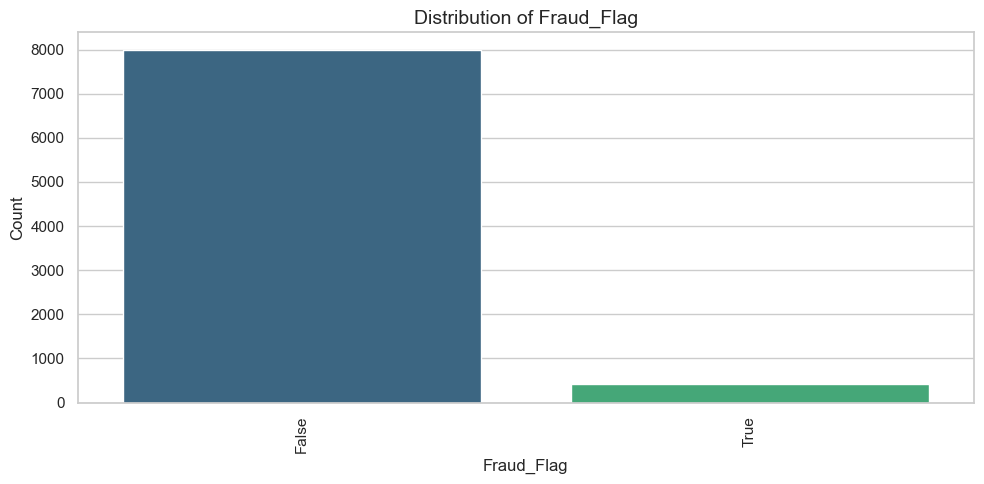

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


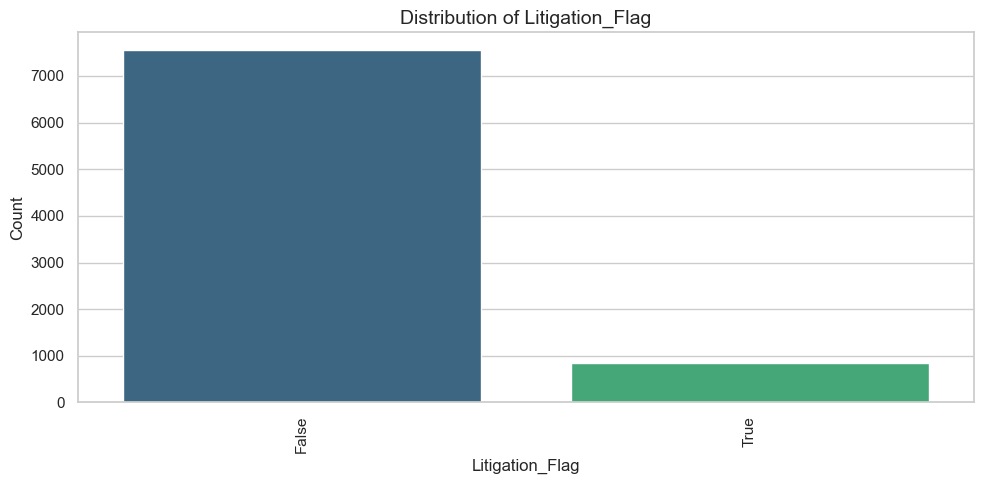

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


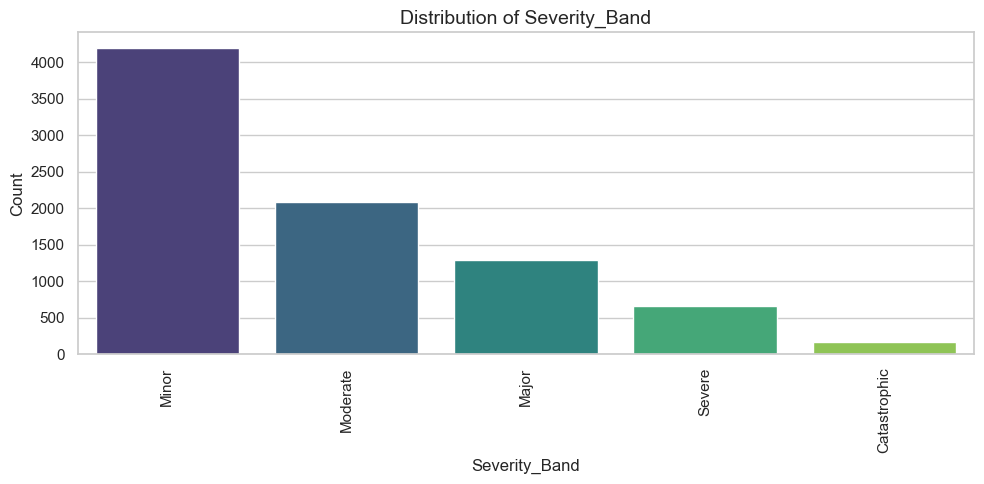

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


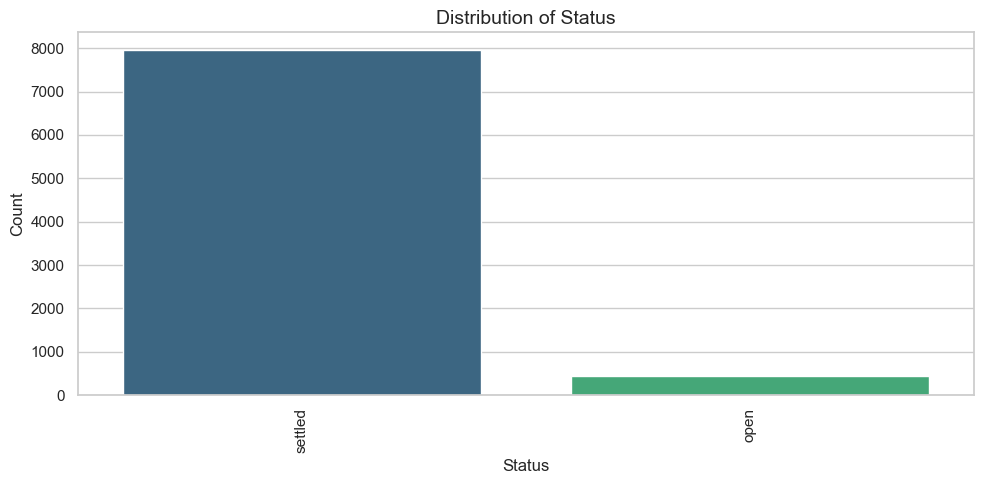

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


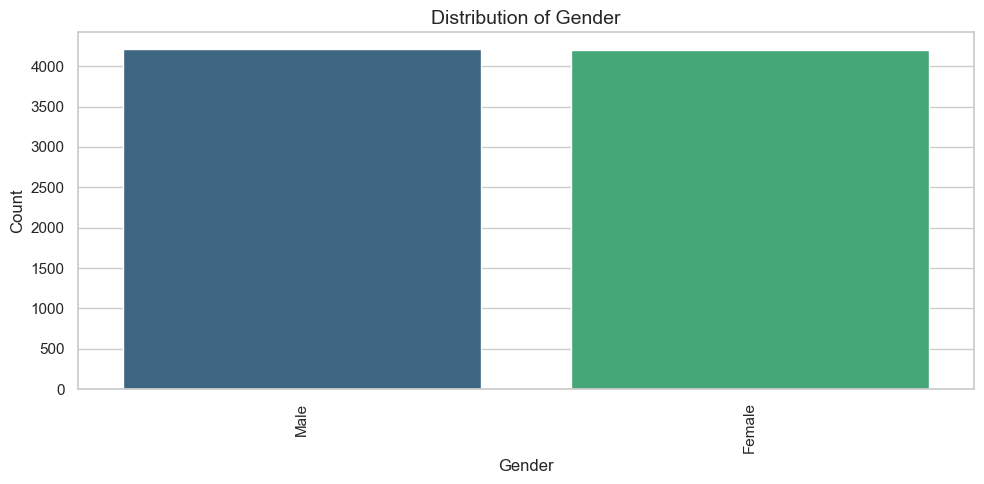

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


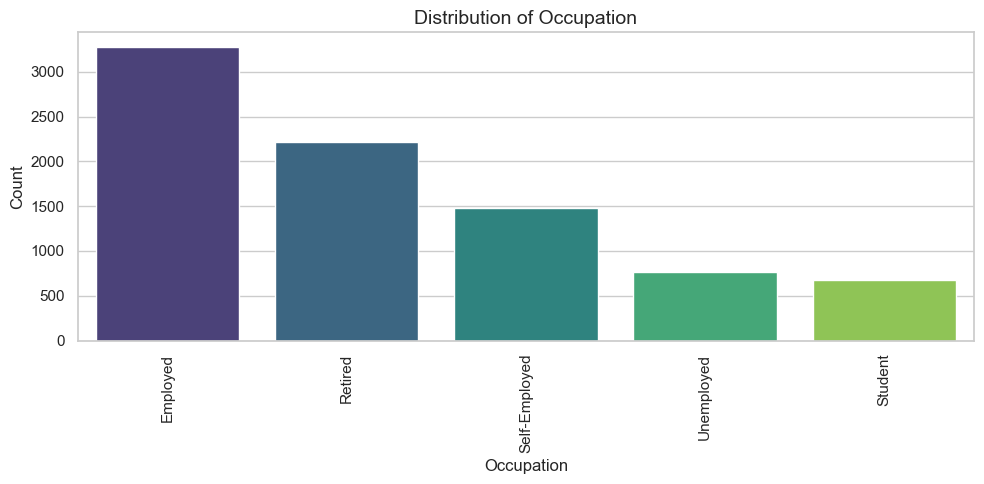

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


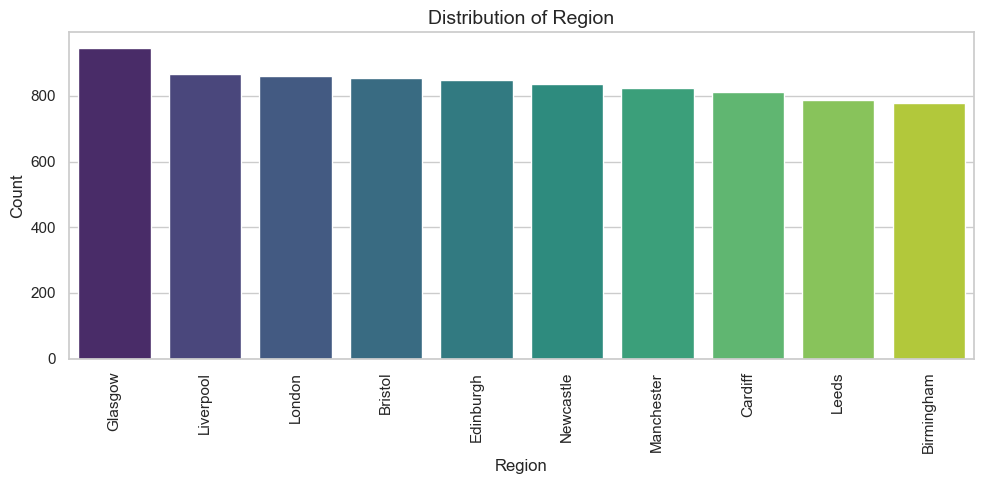

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


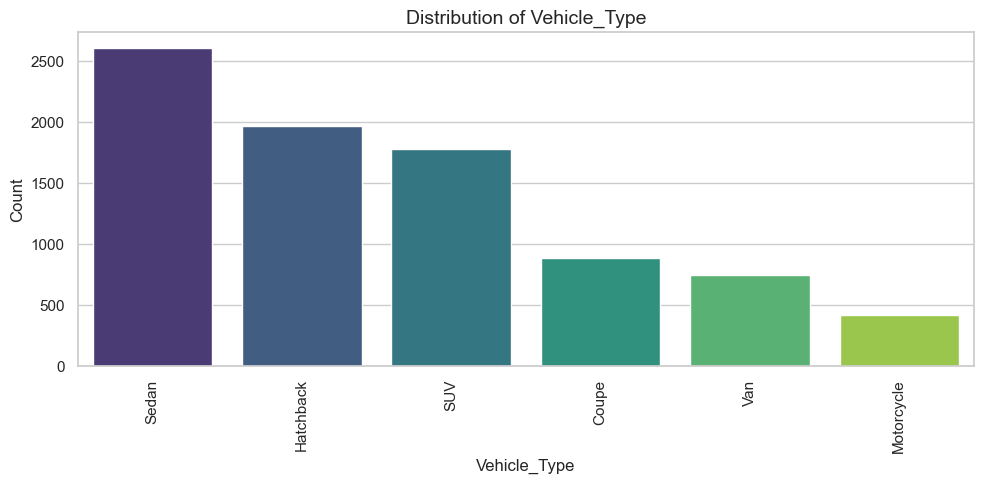

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


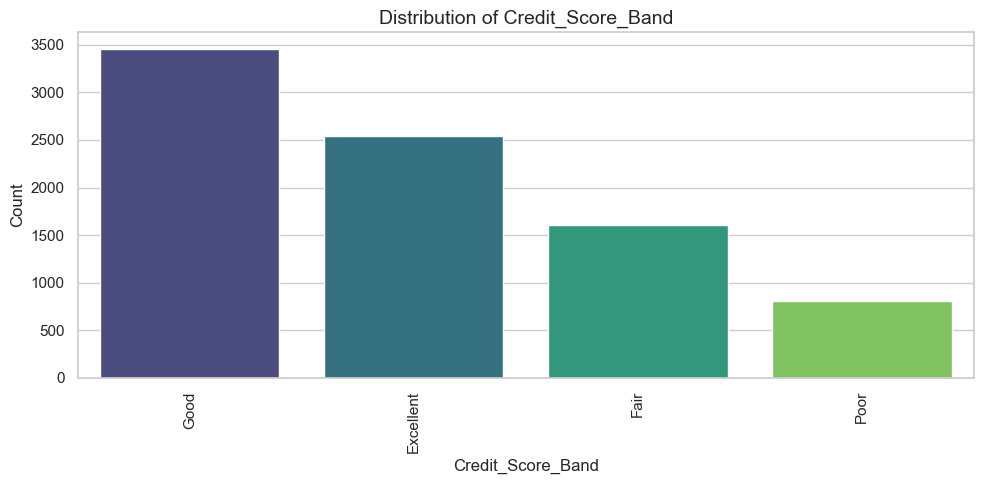

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


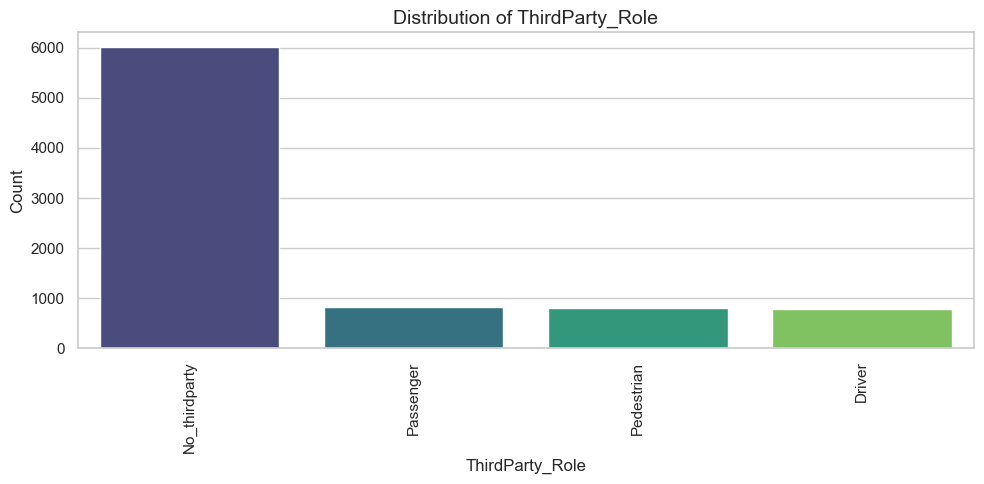

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\2196471759.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")


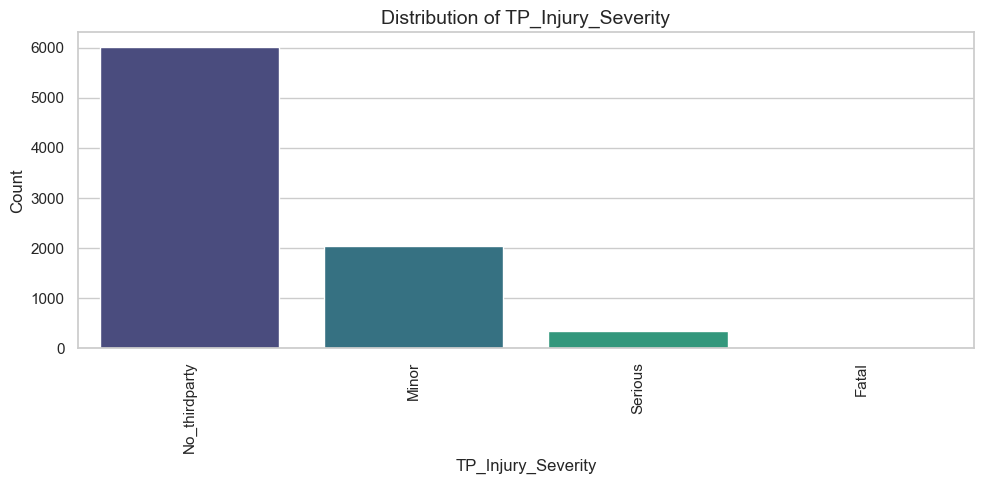

In [33]:
# Automatically select categorical columns (object, bool, category)
categorical_cols = data.select_dtypes(include=['object', 'bool', 'category']).columns

# Set a common style
sns.set(style="whitegrid")

# Loop through each categorical column and plot a barplot
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show();

#### Observation

    - A thorough examination of all patterns and potential issues was conducted, and no inconsistencies were identified within the categorical data.

In [34]:
# Let verify the principal descretive statistic
data.describe(include='all')

,Accident_Date,FNOL_Date,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Settlement_Date,...,Gender,Occupation,Region,Annual_Mileage,Driving_Experience_Years,Vehicle_Type,Vehicle_Age,Credit_Score_Band,ThirdParty_Role,TP_Injury_Severity
count,8413,8413,8413,8413,8413,8413,8.413000e+03,8.413000e+03,8413,8413,...,8413,8413,8413,8413.000000,8413.000000,8413,8413.000000,8413,8413,8413
unique,NaN,NaN,6,3,2,2,NaN,NaN,5,NaN,...,2,5,10,NaN,NaN,6,NaN,4,4,4
top,NaN,NaN,Collision,Low,False,False,NaN,NaN,Minor,NaN,...,Male,Employed,Glasgow,NaN,NaN,Sedan,NaN,Good,No_thirdparty,No_thirdparty
freq,NaN,NaN,4614,5870,7993,7557,NaN,NaN,4201,NaN,...,4208,3276,946,NaN,NaN,2605,NaN,3458,6003,6003
mean,2022-03-31 23:54:51.905384704,2022-04-02 18:02:46.884583168,NaN,NaN,NaN,NaN,1.458019e+04,1.270452e+04,NaN,2022-05-22 08:21:40.843931904,...,NaN,NaN,NaN,12139.720433,29.029716,NaN,10.060502,NaN,NaN,NaN
min,2018-09-19 00:00:00,2018-09-19 00:00:00,NaN,NaN,NaN,NaN,5.500000e+02,3.320000e+02,NaN,2018-10-25 00:00:00,...,NaN,NaN,NaN,500.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,2020-06-20 00:00:00,2020-06-22 00:00:00,NaN,NaN,NaN,NaN,2.203000e+03,1.631000e+03,NaN,2020-06-22 00:00:00,...,NaN,NaN,NaN,9393.000000,14.000000,NaN,5.000000,NaN,NaN,NaN
50%,2022-04-06 00:00:00,2022-04-07 00:00:00,NaN,NaN,NaN,NaN,4.407000e+03,3.409000e+03,NaN,2022-05-06 00:00:00,...,NaN,NaN,NaN,12087.000000,29.000000,NaN,10.000000,NaN,NaN,NaN
75%,2024-01-02 00:00:00,2024-01-04 00:00:00,NaN,NaN,NaN,NaN,1.169100e+04,9.041000e+03,NaN,2024-03-12 00:00:00,...,NaN,NaN,NaN,14875.000000,45.000000,NaN,15.000000,NaN,NaN,NaN
max,2025-09-17 00:00:00,2025-09-22 00:00:00,NaN,NaN,NaN,NaN,1.064239e+06,1.005590e+06,NaN,2027-03-29 00:00:00,...,NaN,NaN,NaN,27410.000000,61.000000,NaN,20.000000,NaN,NaN,NaN


#### Observation

#### Let visualize also the non categorical features

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\1795938154.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\App

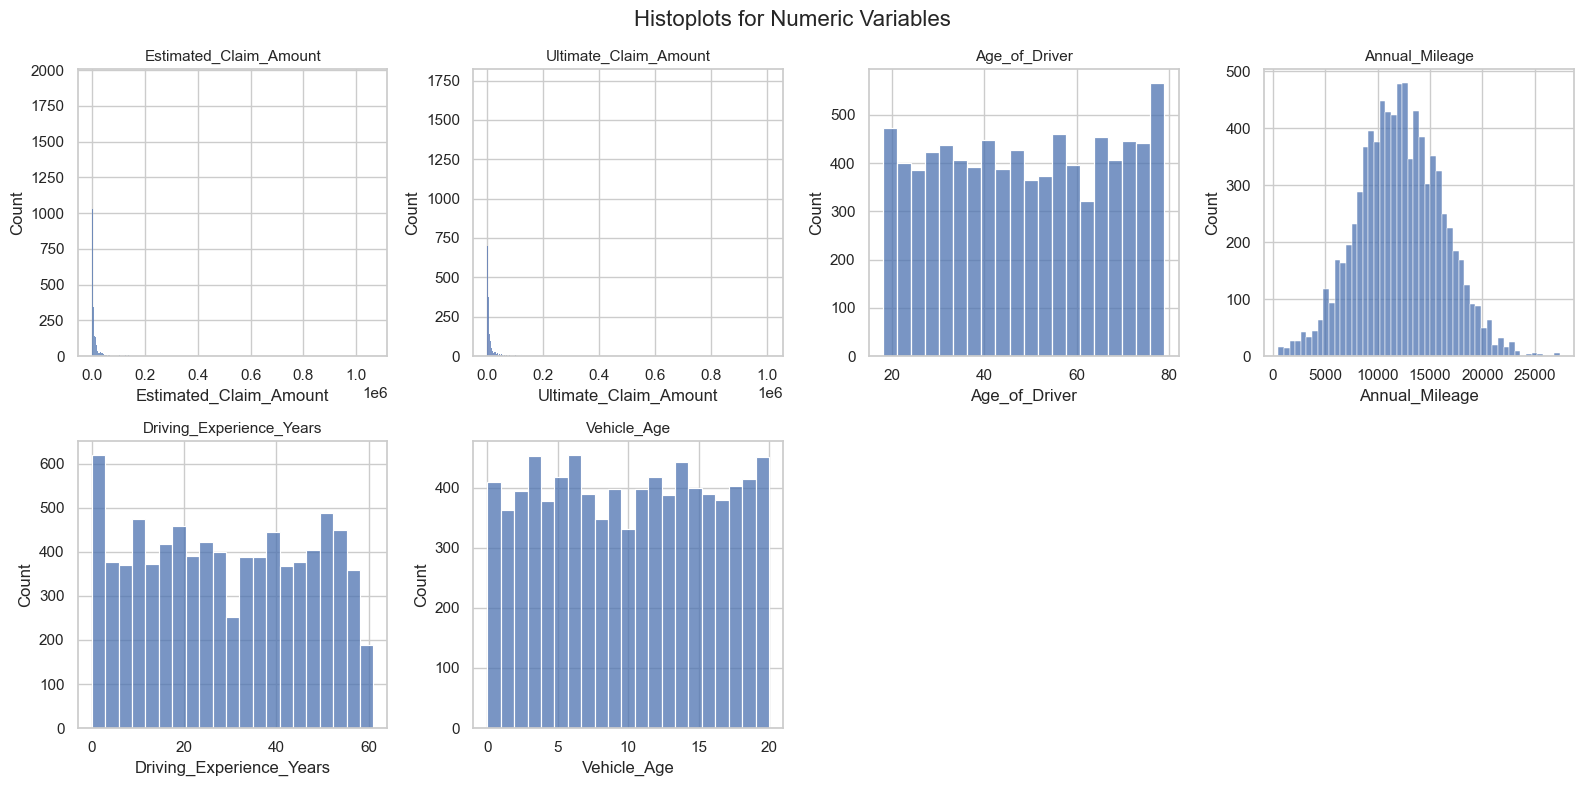

In [35]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Define subplot grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Create a histplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(x=data[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col}", fontsize=11)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histoplots for Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show();

#### Numeric Variable Observation

    Based on our observation we have 7 non categorical columns:

    1. Estimated_Claim_Amount and Ultimate_Claim_Amount

        Both are highly **right-skewed (positively skewed)** with a long tail to the right.
       Most claim amounts are low, but a few are very large.

    2. Age_of_Driver

       This appears to be roughly **uniformly distributed** or slightly irregular across age groups.
      
    3. Annual_Mileage

       This looks like a **normal distribution** with a clear bell-shaped curve centered roughly around 12,000-15,000 miles.

    4. Driving_Experience_Years

       This distribution looks somewhat **uniform with some variation**, no strong skew.
      
    5. Vehicle_Age

       This is fairly **uniform or slightly bimodal**, with counts spread across ages 0 to 20 years.
       Slight fluctuations but no clear skew.

    6. Is_Settled

       This is a **binary/discrete distribution**, essentially a bar chart.
       Almost all values are 1, meaning the claim is settled; very few are 0.


#### Let check and handle outlier

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\4014392158.py:13: FutureWarning: 

Passing `pale

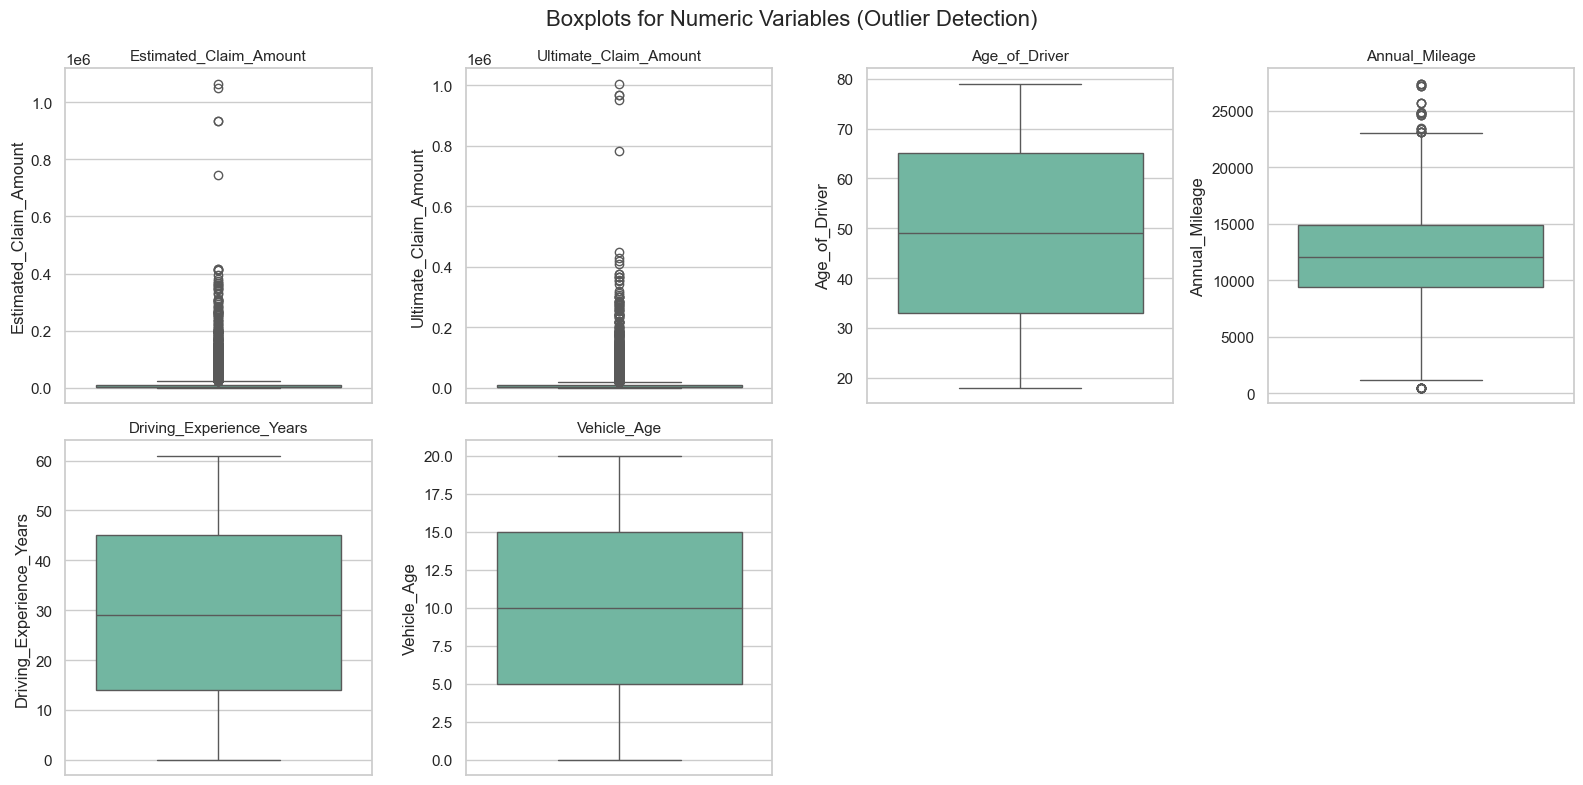

In [36]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Define subplot grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col}", fontsize=11)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots for Numeric Variables (Outlier Detection)", fontsize=16)
plt.tight_layout()
plt.show()

In [37]:
data.columns

Index(['Accident_Date', 'FNOL_Date', 'Claim_Type', 'Claim_Complexity',
       'Fraud_Flag', 'Litigation_Flag', 'Estimated_Claim_Amount',
       'Ultimate_Claim_Amount', 'Severity_Band', 'Settlement_Date', 'Status',
       'Age_of_Driver', 'Gender', 'Occupation', 'Region', 'Annual_Mileage',
       'Driving_Experience_Years', 'Vehicle_Type', 'Vehicle_Age',
       'Credit_Score_Band', 'ThirdParty_Role', 'TP_Injury_Severity'],
      dtype='object')

#### Outlier Observation

    Based on the boxplot analysis, several variables exhibit the presence of outliers:
    
    a) Estimated_Claim_Amount
    b) Ultimate_Claim_Amount
    c) Annual_Mileage

    To address these outliers in a consistent and statistically sound manner, we will apply the Interquartile Range (IQR) method. 

In [38]:
# Columns where outliers were detected
iqr_cols = [
    "Estimated_Claim_Amount",
    "Ultimate_Claim_Amount",
    "Annual_Mileage"
]

for col in iqr_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)


#### Let confirm outlier as been removed

C:\Users\HP\AppData\Local\Temp\ipykernel_9696\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\4014392158.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
C:\Users\HP\AppData\Local\Temp\ipykernel_9696\4014392158.py:13: FutureWarning: 

Passing `pale

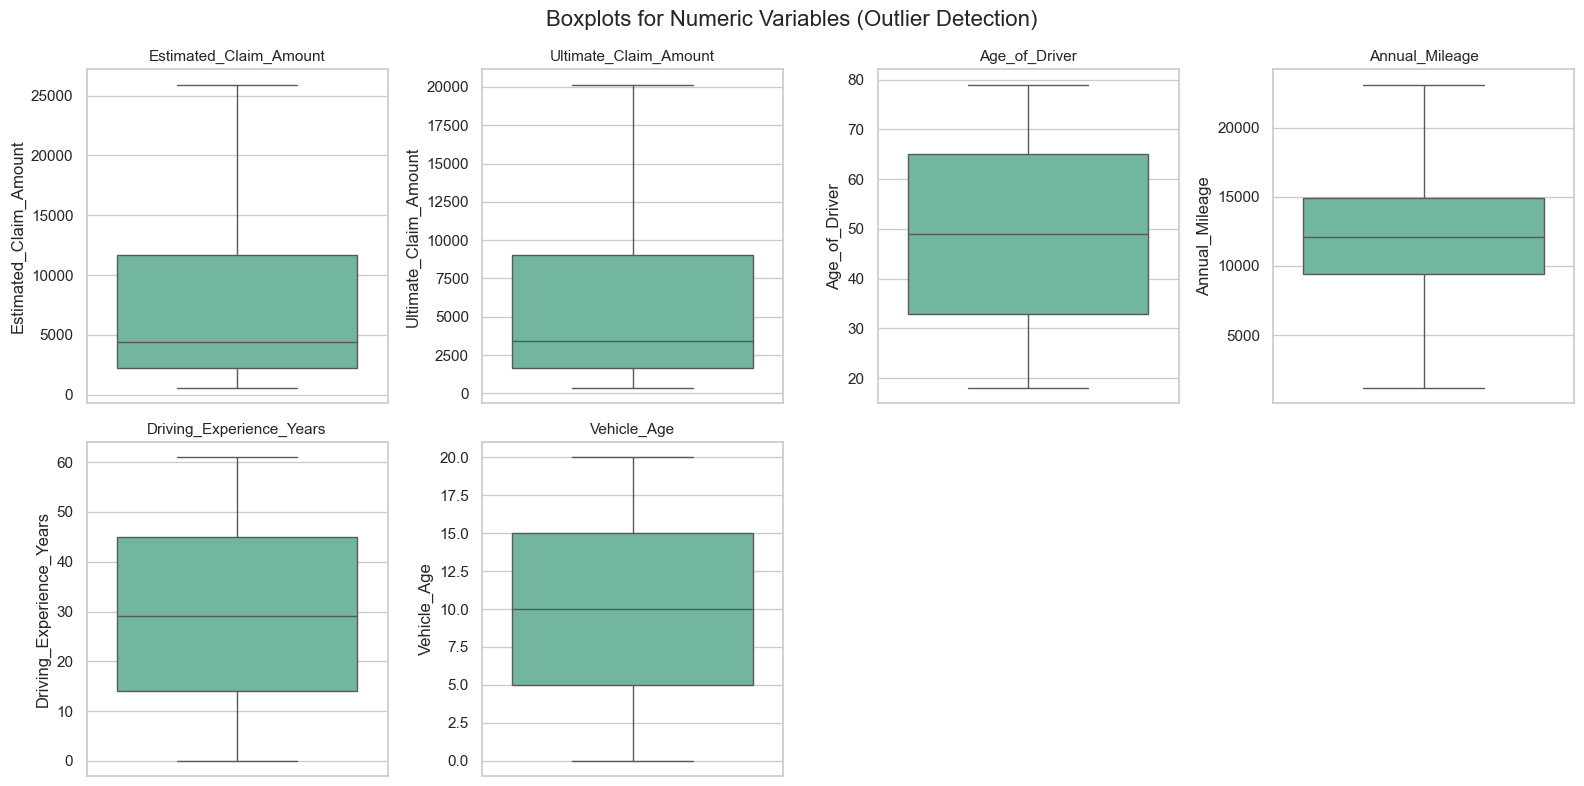

In [39]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

# Define subplot grid size
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=data[col], ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col}", fontsize=11)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots for Numeric Variables (Outlier Detection)", fontsize=16)
plt.tight_layout()
plt.show()

#### Observation

    Outlier removed

#### Let Check the correlation

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Accident_Date             8413 non-null   datetime64[ns]
 1   FNOL_Date                 8413 non-null   datetime64[ns]
 2   Claim_Type                8413 non-null   object        
 3   Claim_Complexity          8413 non-null   object        
 4   Fraud_Flag                8413 non-null   bool          
 5   Litigation_Flag           8413 non-null   bool          
 6   Estimated_Claim_Amount    8413 non-null   int64         
 7   Ultimate_Claim_Amount     8413 non-null   float64       
 8   Severity_Band             8413 non-null   object        
 9   Settlement_Date           8413 non-null   datetime64[ns]
 10  Status                    8413 non-null   object        
 11  Age_of_Driver             8413 non-null   int64         
 12  Gender              

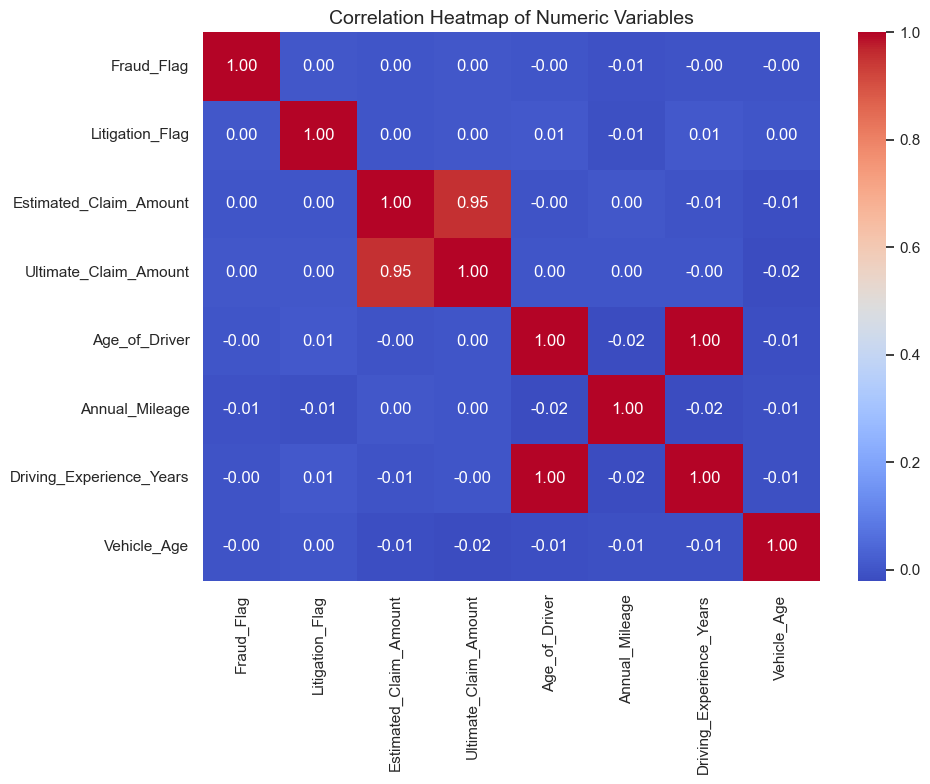

In [41]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["int64", "float64", "bool"]).columns

# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation values
    fmt=".2f",        # Format to 2 decimal places
    cmap="coolwarm",  # Color map
    cbar=True
)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=14)
plt.tight_layout()
plt.show()

#### Correlation Observation

    Strong Positive Correlation:
    
Estimated_Claim_Amount and Ultimate_Claim_Amount have a very high positive correlation (around 0.99). This makes sense because the ultimate claim amount is typically an updated, final value closely related to the initial estimate.

    Age_of_Driver and Driving_Experience_Years are perfectly correlated (1.00).

This likely indicates that these two variables are closely tied—perhaps driving experience is directly derived from the driver's age.

    No Significant Correlation Among Flags and Amounts:
Fraud_Flag and Litigation_Flag show almost no correlation with claim amounts or other numeric variables.

This suggests these flags might be independent indicators or binary labels without strong linear association with monetary amounts.

    No Meaningful Correlation for Annual_Mileage and Vehicle_Age:
These have very weak or near-zero correlations with other numeric features.

    Is_Settled shows almost no correlation with claim amounts or other variables, close to zero.
    
    Missing Values Effect:

Some missing values in Ultimate_Claim_Amount may have led to blanks in the heatmap (white squares), so interpret cautiously.

In [42]:
# Datetime Feature Engineering
datetime_cols = ['Accident_Date', 'FNOL_Date', 'Settlement_Date']

for col in datetime_cols:
    data[col + '_Year'] = data[col].dt.year
    data[col + '_Month'] = data[col].dt.month
    data[col + '_Day'] = data[col].dt.day
    data[col + '_Weekday'] = data[col].dt.weekday  # 0=Monday, 6=Sunday

# Duration between Accident and Settlement
data['Days_to_Settle'] = (data['Settlement_Date'] - data['Accident_Date']).dt.days

# Drop original datetime columns
data = data.drop(columns=datetime_cols)


#### Encode Categorical data

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Claim_Type                8413 non-null   object 
 1   Claim_Complexity          8413 non-null   object 
 2   Fraud_Flag                8413 non-null   bool   
 3   Litigation_Flag           8413 non-null   bool   
 4   Estimated_Claim_Amount    8413 non-null   int64  
 5   Ultimate_Claim_Amount     8413 non-null   float64
 6   Severity_Band             8413 non-null   object 
 7   Status                    8413 non-null   object 
 8   Age_of_Driver             8413 non-null   int64  
 9   Gender                    8413 non-null   object 
 10  Occupation                8413 non-null   object 
 11  Region                    8413 non-null   object 
 12  Annual_Mileage            8413 non-null   int64  
 13  Driving_Experience_Years  8413 non-null   int64  
 14  Vehicle_

In [44]:
# data fist 10 rows confirmation
data.head(10)

,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Status,Age_of_Driver,Gender,...,Accident_Date_Weekday,FNOL_Date_Year,FNOL_Date_Month,FNOL_Date_Day,FNOL_Date_Weekday,Settlement_Date_Year,Settlement_Date_Month,Settlement_Date_Day,Settlement_Date_Weekday,Days_to_Settle
0,Theft,Medium,False,True,5243,2808.0,Minor,settled,53,Female,...,3,2019,12,19,3,2020,3,1,6,73
1,Collision,Low,False,False,3934,2952.0,Minor,settled,43,Female,...,6,2018,12,31,0,2019,3,23,5,83
2,Other,Medium,False,False,25923,20156.0,Catastrophic,settled,19,Female,...,1,2021,10,19,1,2022,4,22,4,185
3,Weather,Low,False,False,2812,1450.0,Minor,settled,26,Male,...,4,2021,6,18,4,2021,9,13,0,87
4,Theft,Low,False,False,5094,4243.0,Minor,settled,27,Female,...,6,2021,3,24,2,2021,5,26,2,66
5,Weather,Low,False,False,2568,1796.0,Minor,settled,51,Female,...,6,2020,4,13,0,2020,6,15,0,64
6,Weather,Medium,False,False,18782,18386.0,Major,settled,36,Female,...,1,2019,11,15,4,2020,5,19,1,189
7,Fire,Low,False,False,15957,13825.0,Minor,settled,64,Female,...,2,2024,11,2,5,2024,12,22,6,53
8,Vandalism,Medium,False,False,1357,1013.0,Minor,settled,54,Male,...,1,2019,9,14,5,2020,2,19,2,162
9,Collision,Low,False,False,2799,1781.0,Minor,settled,29,Male,...,5,2025,5,4,6,2025,6,22,6,50


In [45]:
#### Import LabelEncoder libery
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [46]:
# Includes columns with data type 'object' (strings) and 'bool' (binary categorical)
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns.tolist()


In [47]:
# Initialize LabelEncoder
le = LabelEncoder()

# Loop through categorical columns and apply LabelEncoder
for col in categorical_cols:
    # Only encode if the column is not already numeric
    if data[col].dtype == 'object' or data[col].dtype == 'bool':
        data[col] = le.fit_transform(data[col])

In [48]:
# Check the first few rows
data.head()

,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Status,Age_of_Driver,Gender,...,Accident_Date_Weekday,FNOL_Date_Year,FNOL_Date_Month,FNOL_Date_Day,FNOL_Date_Weekday,Settlement_Date_Year,Settlement_Date_Month,Settlement_Date_Day,Settlement_Date_Weekday,Days_to_Settle
0,3,2,0,1,5243,2808.0,2,1,53,0,...,3,2019,12,19,3,2020,3,1,6,73
1,0,1,0,0,3934,2952.0,2,1,43,0,...,6,2018,12,31,0,2019,3,23,5,83
2,2,2,0,0,25923,20156.0,0,1,19,0,...,1,2021,10,19,1,2022,4,22,4,185
3,5,1,0,0,2812,1450.0,2,1,26,1,...,4,2021,6,18,4,2021,9,13,0,87
4,3,1,0,0,5094,4243.0,2,1,27,0,...,6,2021,3,24,2,2021,5,26,2,66


#### Normalization

    Based on non categorical observation plots, we realized that the data distribution are Normal distribution and uniform distribution, which it means
    we will use for normalization(Scale) StandardScaler

In [49]:
# Let Import the libery
from sklearn.preprocessing import StandardScaler

In [50]:
# Initialize the scaler
scaler = StandardScaler()

# Select numeric columns to scale
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the list of numerical columns
print("Numerical columns:", numeric_cols)


# Fit scaler on the numeric columns and transform
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

Numerical columns: ['Claim_Type', 'Claim_Complexity', 'Fraud_Flag', 'Litigation_Flag', 'Estimated_Claim_Amount', 'Ultimate_Claim_Amount', 'Severity_Band', 'Status', 'Age_of_Driver', 'Gender', 'Occupation', 'Region', 'Annual_Mileage', 'Driving_Experience_Years', 'Vehicle_Type', 'Vehicle_Age', 'Credit_Score_Band', 'ThirdParty_Role', 'TP_Injury_Severity', 'Days_to_Settle']


In [51]:
# Data confirmation
data.head()

,Claim_Type,Claim_Complexity,Fraud_Flag,Litigation_Flag,Estimated_Claim_Amount,Ultimate_Claim_Amount,Severity_Band,Status,Age_of_Driver,Gender,...,Accident_Date_Weekday,FNOL_Date_Year,FNOL_Date_Month,FNOL_Date_Day,FNOL_Date_Weekday,Settlement_Date_Year,Settlement_Date_Month,Settlement_Date_Day,Settlement_Date_Weekday,Days_to_Settle
0,0.707181,1.613585,-0.229229,2.971241,-0.361040,-0.550204,-0.243569,0.236323,0.226241,-1.000357,...,3,2019,12,19,3,2020,3,1,6,0.074164
1,-0.805663,-0.270797,-0.229229,-0.336560,-0.520486,-0.528080,-0.243569,0.236323,-0.332702,-1.000357,...,6,2018,12,31,0,2019,3,23,5,0.108422
2,0.202899,1.613585,-0.229229,-0.336560,2.157935,2.115102,-2.552466,0.236323,-1.674165,-1.000357,...,1,2021,10,19,1,2022,4,22,4,0.457862
3,1.715743,-0.270797,-0.229229,-0.336560,-0.657154,-0.758844,-0.243569,0.236323,-1.282904,0.999643,...,4,2021,6,18,4,2021,9,13,0,0.122126
4,0.707181,-0.270797,-0.229229,-0.336560,-0.379189,-0.329734,-0.243569,0.236323,-1.227010,-1.000357,...,6,2021,3,24,2,2021,5,26,2,0.050182


### 5 DATA SPLITTING

    The TARGET VARIABLE for this poroject is to predict the Ultimate_Claim_Amount based on FNOL
    Our TARGET VARIABLE, is a continue variable (Non binary, or Classification target variable)

    we will split our data in 80% for training and 20% for testing

In [52]:
# Let import librery
from sklearn.model_selection import train_test_split

In [53]:
# Define feature columns (continuous variables)
X = data.drop(columns=['Ultimate_Claim_Amount'])

# Define target column (replace 'target_col' with your actual target)
target_col = 'Ultimate_Claim_Amount'
y = data[target_col]

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 6 MODEL SELECTION

BUSINESS CHALLENGE 

    Insurance companies make critical pricing and reserving decisions based on claims 
data. 
    A major challenge is the uncertainty of the ultimate settlement amount at the time of First Notification of Loss (FNOL). 

● Operational issue:

    When a customer files a claim, only partial information is available, 
but regulators require insurers to allocate capital reserves immediately. 

Inaccurate estimates either tie up excess funds (reducing profitability) or under-allocate reserves 
(creating solvency risks). 
 
● Financial issue: 

     Large and complex claims (e.g., accidents with multiple third parties) 
can take years to settle, making forecasting essential for financial planning. 

● Customer impact: 
                                                      
    Slow or incorrect assessments delay settlements, reducing trust and 
competitive advantage. 
                                                      
Pain points identified: 
                                                      
    1. Incomplete FNOL data leads to uncertainty. 
    2. Claims cost distribution is highly skewed (many small, few very large). 
    3. Lack of advanced predictive tools; current methods rely heavily on actuarial judgment. 
    4. Inefficient allocation of reserves. 
    5. Risk of regulatory non-compliance due to reserve misestimation


PROJECT OBJECTIVES 
                                                      
    1. Develop a machine learning model to predict ultimate claim cost at FNOL. 
    
    2. Identify and rank the most influential claim features (e.g., number of third parties, 
accident severity). 

    3. Improve reserve allocation accuracy by at least 15% compared to current actuarial 
benchmarks. 

    4. Integrate explainability techniques (e.g., SHAP) to ensure regulatory acceptance. 
    
    5. Deploy the solution into GMA’s claims management system with minimal disruption.

Since our dataset contains missing values, we will use XGBoost and LightGBM, which are robust to missing data and can handle it natively without the need for imputation.
                                                   

In [54]:
# Install Ligghtgbm
!pip install lightgbm


In [55]:
# Import libraries
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [56]:
# Initialize models
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

lgb_model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train XGBoost
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Train LightGBM
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 6730, number of used features: 31
[LightGBM] [Info] Start training from score -0.007874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

### 7 EVALUATION

In [57]:
# Define evaluation metrics
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

# Evaluate XGBoost
xgb_rmse, xgb_mae, xgb_mape = evaluate(y_test, xgb_preds)
print(f"XGBoost → RMSE: {xgb_rmse:.2f}, MAE: {xgb_mae:.2f}, MAPE: {xgb_mape:.2f}%")

# Evaluate LightGBM
lgb_rmse, lgb_mae, lgb_mape = evaluate(y_test, lgb_preds)
print(f"LightGBM → RMSE: {lgb_rmse:.2f}, MAE: {lgb_mae:.2f}, MAPE: {lgb_mape:.2f}%")

XGBoost → RMSE: 0.16, MAE: 0.08, MAPE: 32.41%
LightGBM → RMSE: 0.16, MAE: 0.08, MAPE: 33.31%


In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize model
xgb_model = xgb.XGBRegressor(random_state=42)

# Randomized Search
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=50,  # number of parameter combinations to try
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit search
xgb_search.fit(X_train, y_train)

# Best parameters and score
print("Best XGBoost Parameters:", xgb_search.best_params_)
print("Best XGBoost RMSE:", -xgb_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best XGBoost RMSE: 0.16297763054745787


In [59]:
# Define parameter grid
lgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 50, 70],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Initialize model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Randomized Search
lgb_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_params,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit search
lgb_search.fit(X_train, y_train)

# Best parameters and score
print("Best LightGBM Parameters:", lgb_search.best_params_)
print("Best LightGBM RMSE:", -lgb_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 6730, number of used features: 31
[LightGBM] [Info] Start training from score -0.007874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [60]:
# Let isntall Shap
!pip install shap

### 8 SHAP 

In [61]:
# Initialize the shap
import shap
import lightgbm as lgb

# Train model
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train)

# SHAP explainer
explainer = shap.TreeExplainer(
    model_lgb,
    data=X_train,
    feature_perturbation="interventional"
)

shap_values = explainer.shap_values(X_test, check_additivity=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 6730, number of used features: 31
[LightGBM] [Info] Start training from score -0.007874


In [62]:
# Ass the Shape
shap_array = shap_values

In [63]:
# Select sample to explain
sample_index = 0

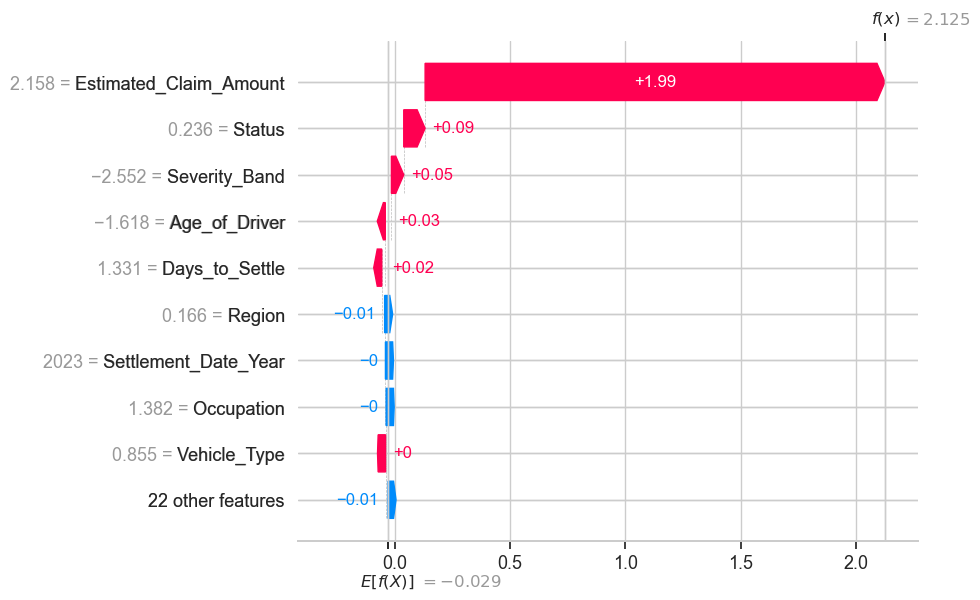

In [64]:
# Build SHAP Explanation object (REGRESSION)
shap_explanation = shap.Explanation(
    values=shap_values[sample_index],
    base_values=explainer.expected_value,
    data=X_test.iloc[sample_index],
    feature_names=X_test.columns
)

# Plot waterfall
shap.plots.waterfall(shap_explanation)


#### Observation

### Regression Model SHAP Interpretation

The regression model’s **base value** is **−0.029**, representing the average predicted claim amount across the training dataset. The **final prediction** for this particular case is **2.125**, indicating that the model estimates this claim to be substantially higher than the average.

#### Feature Contributions:

* **Estimated_Claim_Amount (+1.99):**
  This feature demonstrates strong predictive power and is the primary driver of the prediction, accounting for over 90% of the total uplift. Its dominant contribution indicates that the model relies heavily on this feature to estimate claim amounts.

* **Status (+0.09):**
  Represents a small incremental risk increase. This feature correlates with higher settlement amounts and may reflect claim progression stages such as escalation, approval, or litigation.

* **Severity_Band (+0.05):**
  Although higher severity bands generally correspond to increased payouts, this effect is smaller than anticipated because some of the severity information is indirectly captured by the Estimated_Claim_Amount.

* **Age_of_Driver (+0.03):**
  Contributes a slight upward effect. While it is not a primary risk discriminator on its own, it may reflect demographic risk patterns associated with certain age groups.

* **Region (−0.01):**
  Shows a marginally protective effect, suggesting that claims from certain regions tend to have slightly lower predicted costs.

* **Occupation and Vehicle_Type (0):**
  These features do not have a meaningful impact on the prediction for this specific instance.

---

### Executive Summary

The model’s predicted claim amount of **2.125**, considerably above the portfolio average, is overwhelmingly influenced by the **Estimated Claim Amount**, which contributes the vast majority of the prediction uplift. Secondary features such as **Status**, **Severity Band**, and **Settlement Duration** offer minor reinforcing contributions, whereas regional and temporal factors exert a slight downward adjustment.

Overall, the model’s behavior in this case is stable and intuitive. However, the strong dependence on a single feature highlights the need for governance measures to ensure model robustness and to guard against potential data leakage or overfitting related to the Estimated Claim Amount.

--

### 9 Features importance

                     feature  importance
4     Estimated_Claim_Amount         622
30            Days_to_Settle         224
11            Annual_Mileage         213
5              Severity_Band         183
28       Settlement_Date_Day         143
14               Vehicle_Age         125
7              Age_of_Driver         123
6                     Status         116
24             FNOL_Date_Day         112
20         Accident_Date_Day         108
12  Driving_Experience_Years         108
10                    Region         101
29   Settlement_Date_Weekday          77
21     Accident_Date_Weekday          72
0                 Claim_Type          70
27     Settlement_Date_Month          70
26      Settlement_Date_Year          61
25         FNOL_Date_Weekday          59
13              Vehicle_Type          59
18        Accident_Date_Year          53
9                 Occupation          52
15         Credit_Score_Band          52
19       Accident_Date_Month          45
16           Thi

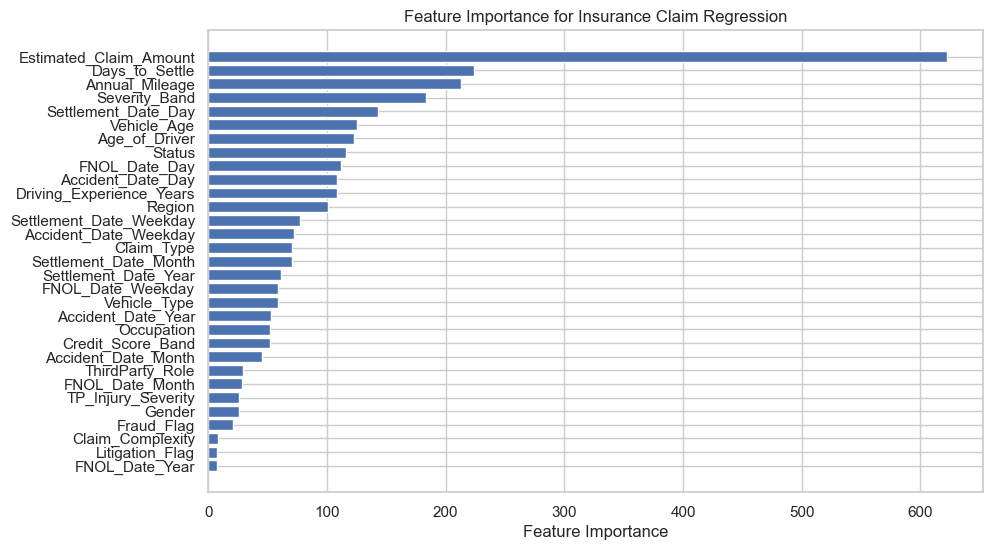

In [65]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_lgb.feature_importances_
}).sort_values(by='importance', ascending=False)

# Display top features
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.gca().invert_yaxis()  # Highest on top
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Insurance Claim Regression")
plt.show()

